In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import DataFrame, Series

In [50]:
#cleaning of the data

In [51]:
data = pd.read_csv('C:/Users/admin/Desktop/Bootcamp/archive/ITSalarySurveyEU2020.csv')

In [52]:
data.columns

Index(['Timestamp', 'Age', 'Gender', 'City', 'Position ',
       'Total years of experience', 'Years of experience in Germany',
       'Seniority level', 'Your main technology / programming language',
       'Other technologies/programming languages you use often',
       'Yearly brutto salary (without bonus and stocks) in EUR',
       'Yearly bonus + stocks in EUR',
       'Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country',
       'Annual bonus+stocks one year ago. Only answer if staying in same country',
       'Number of vacation days', 'Employment status', 'Сontract duration',
       'Main language at work', 'Company size', 'Company type',
       'Have you lost your job due to the coronavirus outbreak?',
       'Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week',
       'Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 20

In [53]:
data.head()

,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,...,Annual bonus+stocks one year ago. Only answer if staying in same country,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week","Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR"
0,24/11/2020 11:14:15,26.0,Male,Munich,Software Engineer,5,3,Senior,TypeScript,"Kotlin, Javascript / Typescript",...,10000,30,Full-time employee,Unlimited contract,English,51-100,Product,No,NaN,NaN
1,24/11/2020 11:14:16,26.0,Male,Berlin,Backend Developer,7,4,Senior,Ruby,NaN,...,5000,28,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN
2,24/11/2020 11:14:21,29.0,Male,Berlin,Software Engineer,12,6,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",...,100000,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product,Yes,NaN,NaN
3,24/11/2020 11:15:24,28.0,Male,Berlin,Frontend Developer,4,1,Junior,Javascript,NaN,...,NaN,24,Full-time employee,Unlimited contract,English,51-100,Startup,No,NaN,NaN
4,24/11/2020 11:15:46,37.0,Male,Berlin,Backend Developer,17,6,Senior,C# .NET,".NET, SQL, AWS, Docker",...,NaN,29,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN


In [54]:
data.columns = ["Year", "Age", "Gender","City","Position","Years of experience","Germany Experience","Seniority level","Tech program language",
                       "Other Language","Yearly salary","Yearly bonus and stocks", "Salary one year ago","Bonus and stocks last year","Vacation days",
                       "Employment_status","Сontract_duration","Language","Company size","Company type","Job loss COVID","Kurzarbeit","Monetary Support"]
data.columns = data.columns.str.replace(' ', '_')

In [55]:
del data['Germany_Experience']
del data['Other_Language']
del data['Employment_status']
del data['Сontract_duration']

In [56]:
data.shape

(1253, 19)

In [57]:
data.isna().sum()

Year                            0
Age                            27
Gender                         10
City                            0
Position                        6
Years_of_experience            16
Seniority_level                12
Tech_program_language         127
Yearly_salary                   0
Yearly_bonus_and_stocks       424
Salary_one_year_ago           368
Bonus_and_stocks_last_year    639
Vacation_days                  68
Language                       16
Company_size                   18
Company_type                   25
Job_loss_COVID                 20
Kurzarbeit                    880
Monetary_Support              791
dtype: int64

In [58]:
data=data.dropna(subset=['Age','Gender','Position','Years_of_experience','Seniority_level','Salary_one_year_ago','Language']) 
data=data.drop_duplicates()

In [59]:
data.isna().sum()

Year                            0
Age                             0
Gender                          0
City                            0
Position                        0
Years_of_experience             0
Seniority_level                 0
Tech_program_language          70
Yearly_salary                   0
Yearly_bonus_and_stocks       235
Salary_one_year_ago             0
Bonus_and_stocks_last_year    276
Vacation_days                  12
Language                        0
Company_size                    0
Company_type                    2
Job_loss_COVID                  2
Kurzarbeit                    575
Monetary_Support              511
dtype: int64

In [60]:
data['Year'] = pd.to_datetime(data['Year']).dt.year

In [61]:
data_filtered = data[data['Year']==2020]

In [62]:
data_filtered = data_filtered.replace({'City': {'ü': 'u', 'ö': 'o','ń':'n'}}, regex=True)
data_filtered['City'] = data_filtered['City'].str.title().str.strip()

data_filtered=data_filtered.replace({'City': {'Nurnberg': 'Nuremberg','Kiev': 'Kyiv','Koln':'Cologne','Den Haag':'The Haag',
                                                            'Cracovia':'Krakow','Bolingen':'Bollingen','Braunschweig':'Brunswick',
                                                            'Sevilla':'Seville','Saint-Petersburg':'Saint Petersburg','Dusseldurf':'Dusseldorf'
                }})

In [63]:
data_filtered['Position'] = data_filtered['Position'].str.title().str.strip()

counts_2020=data_filtered.Position.value_counts()
cutoff1=3
cutoff1_keep= list(counts_2020[counts_2020.values>=cutoff1].index)
data_filtered['Position'] = data_filtered['Position'].where(data_filtered['Position'].isin(cutoff1_keep), 'Other')

In [64]:
data_filtered.dtypes


Year                            int64
Age                           float64
Gender                         object
City                           object
Position                       object
Years_of_experience            object
Seniority_level                object
Tech_program_language          object
Yearly_salary                 float64
Yearly_bonus_and_stocks        object
Salary_one_year_ago           float64
Bonus_and_stocks_last_year     object
Vacation_days                  object
Language                       object
Company_size                   object
Company_type                   object
Job_loss_COVID                 object
Kurzarbeit                    float64
Monetary_Support               object
dtype: object

In [65]:
data_filtered['Years_of_experience']=data_filtered['Years_of_experience'].astype(str)

data_filtered['Years_of_experience']=data_filtered['Years_of_experience'].str.replace(r',', '.',regex=True)
data_filtered['Years_of_experience']=data_filtered['Years_of_experience'].str.replace(r'6 \(not as a data scientist. but as a lab scientist\)',
                                                                                                    '6',regex=True)
data_filtered['Years_of_experience']=data_filtered['Years_of_experience'].str.replace(r'15\. thereof 8 as CTO','15',regex=True)
data_filtered['Years_of_experience']=data_filtered['Years_of_experience'].str.replace(r'1 \(as QA Engineer\) / 11 in total','11',regex=True)
data_filtered['Years_of_experience']=data_filtered['Years_of_experience'].str.replace(r'less than year','1',regex=True) 
data_filtered['Years_of_experience'] = pd.to_numeric(data_filtered['Years_of_experience'])        


In [66]:
data_filtered['Seniority_level'] = data_filtered['Seniority_level'].str.title().str.strip()
data_filtered=data_filtered.replace({'Seniority_level': {'Lead': 'Senior','Head': 'Senior','Principal':'Senior','Student':'Junior',
                                                                       'Intern':'Junior','Working Student':'Junior','C-Level':'Senior',
                                                                       'No Idea, There Are No Ranges In The Firm':'Na','Director':'Senior',
                                                                       'C-Level Executive Manager':'Senior','Key': 'Na','No Level':'Na','Cto':'Senior',
                                                                       'Work Center Manager':'Senior','Manager':'Senior','Vp':'Senior',
                                                                       'Entry Level':'Junior'}})

In [67]:
data_filtered['Tech_program_language'] = data_filtered['Tech_program_language'].str.title().str.strip()

In [68]:
data_filtered = data_filtered.drop(data_filtered[data_filtered.Yearly_salary > 500000].index)

In [69]:
data_filtered = data_filtered.drop(data_filtered[data_filtered.Salary_one_year_ago > 500000].index)

In [70]:

data_filtered['Vacation_days'] = data_filtered['Vacation_days'].str.title().str.strip()
data_filtered=data_filtered.replace({'Vacation_days': {'23+': '23','24 Labour Days': '24','~25':'25',
                                                                     '30 In Contract (But Theoretically Unlimited)':'365',
                                                                     'Unlimited':'365','(No Idea)':'Na'}})

In [71]:
data_filtered['Language'] = data_filtered['Language'].str.replace('Deutsch', 'German')
data_filtered=data_filtered.replace({'Language': {'English and German': 'Multiple', 'Русский': 'Russian','50/50':'Multiple',
                                                                'Deuglisch':'German','both':'Multiple','Russian, English':'Multiple'}})

In [72]:
data_filtered=data_filtered.replace({'Job_loss_COVID': {'i didn\'t but will be looking for new one because of covid': 'No',
                                                                      'kurzarbeitzeit for 1.5 months': 'No',
                                                                      'Lost the job but for different reason':'No',
                                                                      'yes but found a new one with better pay / perks':'Yes',
                                                                      'No, but there was a salary cut at 10% for 3 months and then at 5% for further 3 months':'No',
                                                                      'Leads and project inquiries have slowed down':'No',
                                                                      'Have been a freelancer at the beginning of year':'Yes',
                                                                       'Laid off for a bit':'Laid Off'}})

In [73]:
data_filtered['Monetary_Support'] = data_filtered['Monetary_Support'].str.title().str.strip()

Monetary_2020=data_filtered.Monetary_Support.value_counts()
cutoff2=3
cutoff2_keep= list(Monetary_2020[Monetary_2020.values>=cutoff2].index)
data_filtered['Monetary_Support'] = data_filtered['Monetary_Support'].where(data_filtered['Monetary_Support'].isin(cutoff2_keep), 'Other')

In [74]:
data_filtered.shape

(830, 19)

In [75]:
data_filtered.describe().round()

,Year,Age,Years_of_experience,Yearly_salary,Salary_one_year_ago,Kurzarbeit
count,830.0,830.0,830.0,830.0,830.0,274.0
mean,2020.0,33.0,9.0,72557.0,66156.0,13.0
std,0.0,5.0,5.0,22423.0,20850.0,16.0
min,2020.0,22.0,0.0,12000.0,11000.0,0.0
25%,2020.0,29.0,5.0,60000.0,55000.0,0.0
50%,2020.0,32.0,9.0,70000.0,65000.0,0.0
75%,2020.0,36.0,12.0,80000.0,75000.0,30.0
max,2020.0,66.0,40.0,250000.0,230000.0,40.0


In [76]:
## Analysis

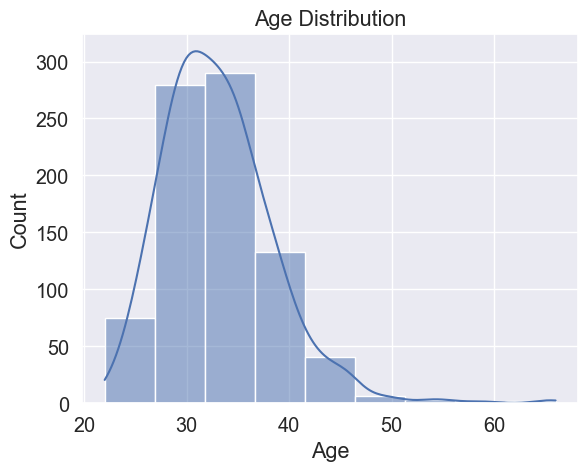

Age Descriptive Statistics


count    830.0
mean      33.0
std        5.0
min       22.0
25%       29.0
50%       32.0
75%       36.0
max       66.0
Name: Age, dtype: float64

In [77]:
sns.set(font_scale=1.3)
plot=sns.histplot(data_filtered.Age,bins=9,kde=True)
plt.title('Age Distribution')
plt.show()
print('Age Descriptive Statistics')
data_filtered['Age'].describe().round()

In [78]:
q1 = data_filtered['Years_of_experience'].quantile(0.25)
q3 = data_filtered['Years_of_experience'].quantile(0.75)
iqr = q3 - q1

# compute the median and IQR by seniority level
level_agg = data_filtered.groupby('Seniority_level').agg(
    Median_ye=('Years_of_experience', np.median),
    IQR=('Years_of_experience', lambda x: iqr)
).reset_index()

# drop the row with index 2
level_agg.drop([2], axis=0, inplace=True)

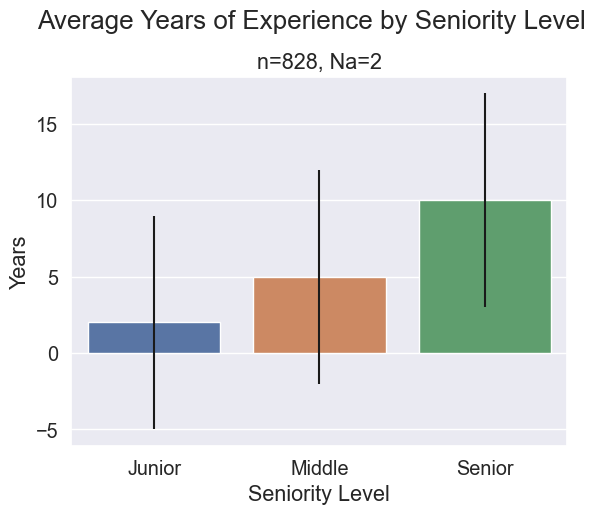

,Seniority_level,Median_ye,IQR
0,Junior,2.0,7.0
1,Middle,5.0,7.0
3,Senior,10.0,7.0


In [79]:
iqr = level_agg["IQR"]
sns.barplot(data=level_agg, x="Seniority_level", y="Median_ye", yerr=iqr)
plt.suptitle("Average Years of Experience by Seniority Level",y=1.02)
plt.title('n=828, Na=2')
plt.ylabel('Years')
plt.xlabel('Seniority Level')
plt.show()

level_agg

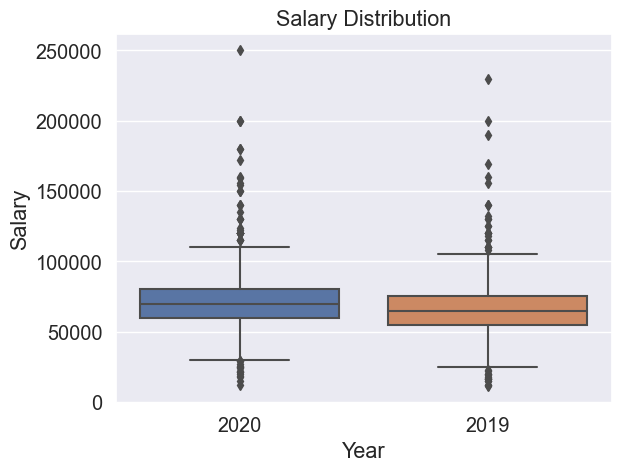

,Yearly_salary,Salary_one_year_ago
count,830.0,830.0
mean,72557.0,66156.0
std,22423.0,20850.0
min,12000.0,11000.0
25%,60000.0,55000.0
50%,70000.0,65000.0
75%,80000.0,75000.0
max,250000.0,230000.0


In [80]:
g = sns.boxplot(data=data_filtered.loc[:,['Yearly_salary','Salary_one_year_ago']])
g.set_xticklabels(['2020', '2019'])
plt.title('Salary Distribution')
plt.ylabel('Salary')
plt.xlabel('Year')
plt.show()

data_filtered[['Yearly_salary','Salary_one_year_ago']].describe().round()

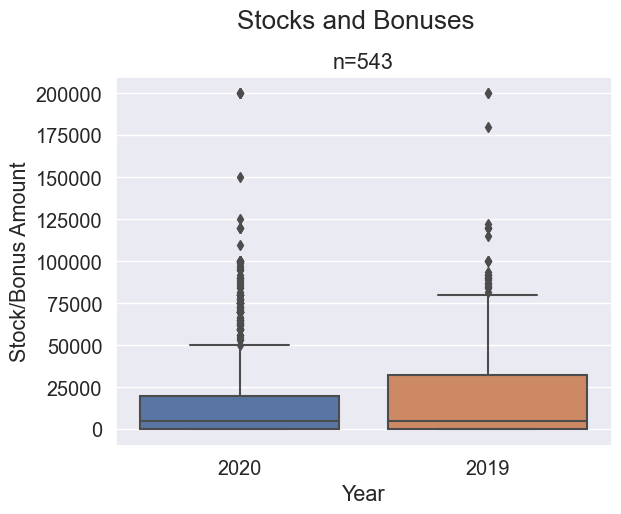

,Yearly_bonus_and_stocks,Bonus_and_stocks_last_year
count,543.0,543.0
mean,19890.0,20582.0
std,32831.0,31589.0
min,0.0,0.0
25%,0.0,0.0
50%,5000.0,5000.0
75%,20000.0,32250.0
max,200000.0,200000.0


In [81]:
stocks=data_filtered[data_filtered['Yearly_bonus_and_stocks'].notnull()]
stocks=stocks[stocks['Bonus_and_stocks_last_year'].notnull()]

stocks = stocks.drop(stocks[stocks.Yearly_bonus_and_stocks == 'bvg only'].index)
stocks = stocks.drop(stocks[stocks.Bonus_and_stocks_last_year == 'learning budget, bvg, gym, food'].index)
stocks = stocks.astype({'Yearly_bonus_and_stocks':'float','Bonus_and_stocks_last_year':'float'})
stock_drop = stocks.drop(stocks[stocks.Yearly_bonus_and_stocks > 400000].index)

g=sns.boxplot(data=stock_drop.loc[:,['Yearly_bonus_and_stocks','Bonus_and_stocks_last_year']])
g.set_xticklabels(['2020', '2019'])
plt.suptitle("Stocks and Bonuses",y=1.02)
plt.title('n=543')
plt.ylabel('Stock/Bonus Amount')
plt.xlabel('Year')
plt.show()

#stocks[['Yearly_bonus_and_stocks','Bonus_and_stocks_last_year']].describe().round()
stock_drop[['Yearly_bonus_and_stocks','Bonus_and_stocks_last_year']].describe().round()

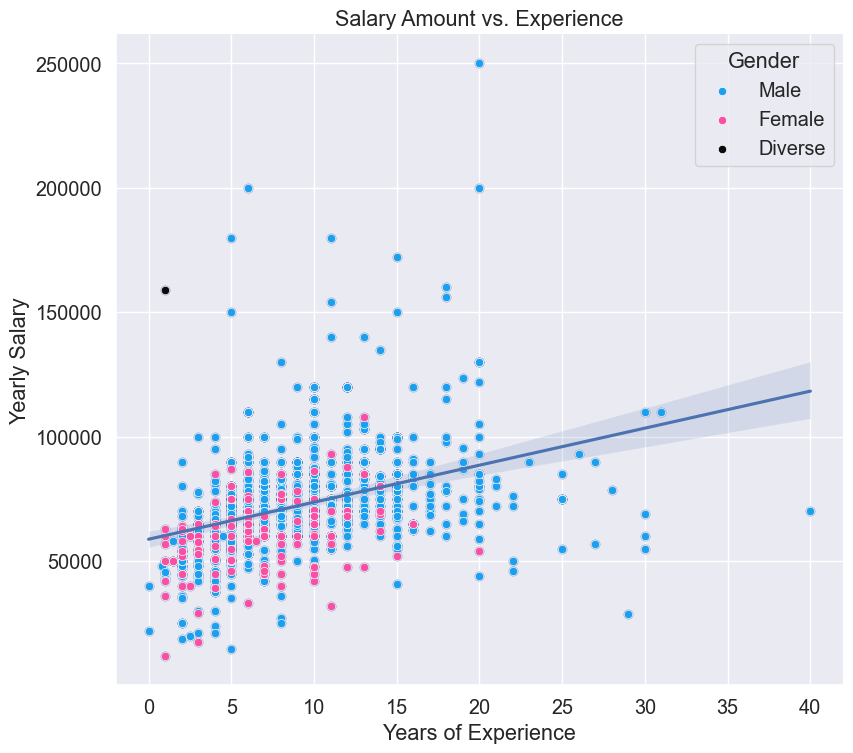

In [82]:
g = sns.FacetGrid(data_filtered,hue='Gender',palette=["#1C9FEF", "#FA50A3", "#0C0B0B"])
sns.regplot(x='Years_of_experience', y="Yearly_salary", data=data_filtered)
g=g.map(sns.scatterplot,'Years_of_experience',"Yearly_salary")
g.set(xticks=[0,5, 10,15,20,25,30,35,40], yticks=[50000, 100000, 150000,200000,250000])
g.fig.set_figwidth(15)
g.fig.set_figheight(10)

g.axes[0,0].set_ylabel('Yearly Salary')
g.axes[0,0].set_xlabel('Years of Experience')
plt.title('Salary Amount vs. Experience')
plt.legend (title='Gender')
plt.show()

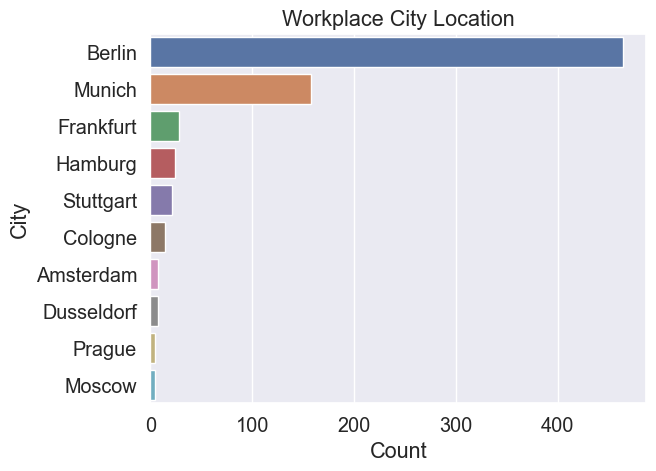

In [83]:
city10=data_filtered.City.value_counts().iloc[:10].to_frame().reset_index()
city10=city10.rename(columns={"index": "City", "City": "Count"})

sns.barplot(x=city10["Count"],y=city10["City"])
plt.title('Workplace City Location')
plt.show()

In [84]:
language=data_filtered.Language.value_counts()
print('Percentage of Participants Spoken Language')
x=(language/language.sum())*100
round(x,2)

Percentage of Participants Spoken Language


English     80.96
German      16.63
Russian      1.08
Multiple     0.36
Italian      0.36
Czech        0.24
Spanish      0.24
Polish       0.12
Name: Language, dtype: float64

In [86]:
position=data_filtered.Position.value_counts().reset_index().iloc[:11]
position=position.rename(columns={"index": "Position", "Position": "Count"})
position.drop([2], axis=0, inplace=True)

top10=[]
for x in position['Position']:
     if x not in top10:
        top10.append(x)
        
rslt_df = data_filtered[data_filtered['Position'].isin(top10)] 

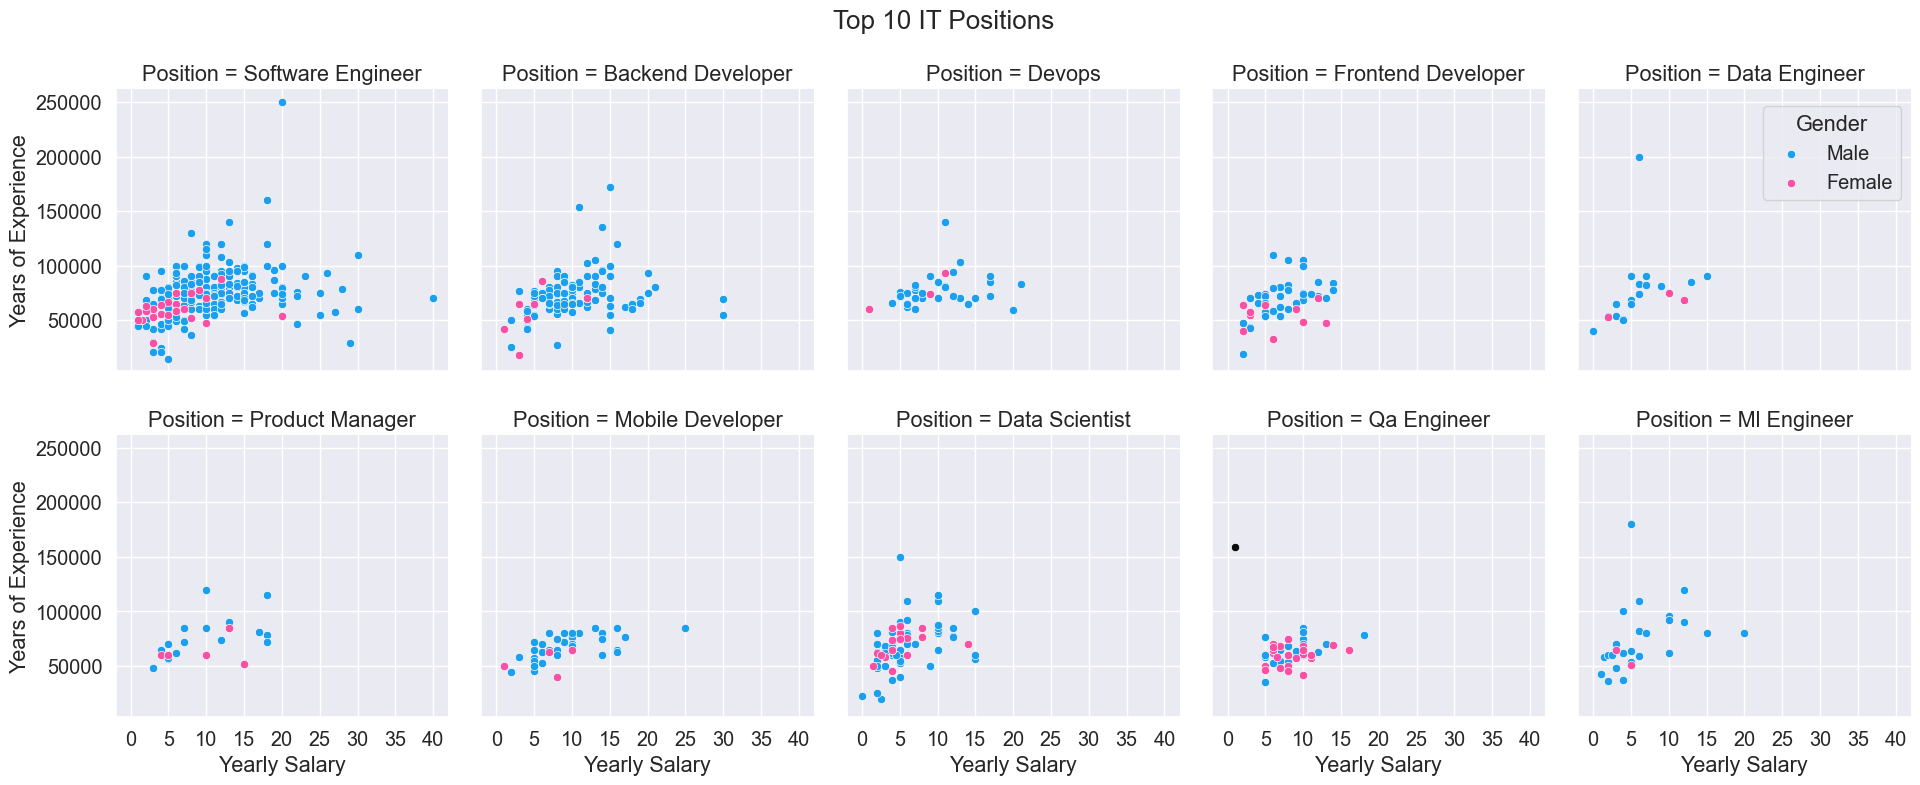

In [87]:
g = sns.FacetGrid(rslt_df, col='Position', hue='Gender',palette=["#1C9FEF", "#FA50A3", "#0C0B0B"],col_wrap=5,)
g=g.map(sns.scatterplot,'Years_of_experience',"Yearly_salary")
g.set(xticks=[0,5, 10,15,20,25,30,35,40], yticks=[50000, 100000, 150000,200000,250000],xlabel='Yearly Salary', ylabel='Years of Experience')
g.fig.set_figwidth(20)
g.fig.set_figheight(8)
plt.suptitle('Top 10 IT Positions',y=1.02)
plt.legend (loc='upper right',title='Gender',bbox_to_anchor=(1,2.2))

plt.show()

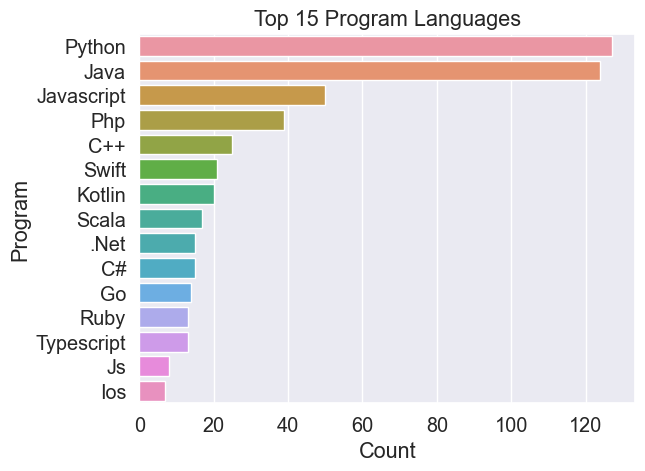

In [88]:
program=rslt_df["Tech_program_language"].value_counts().iloc[:15].reset_index()
program=program.rename(columns={"index": "Program", "Tech_program_language": "Count"})
sns.barplot(data=program, y="Program", x="Count")
plt.title('Top 15 Program Languages')
plt.show()

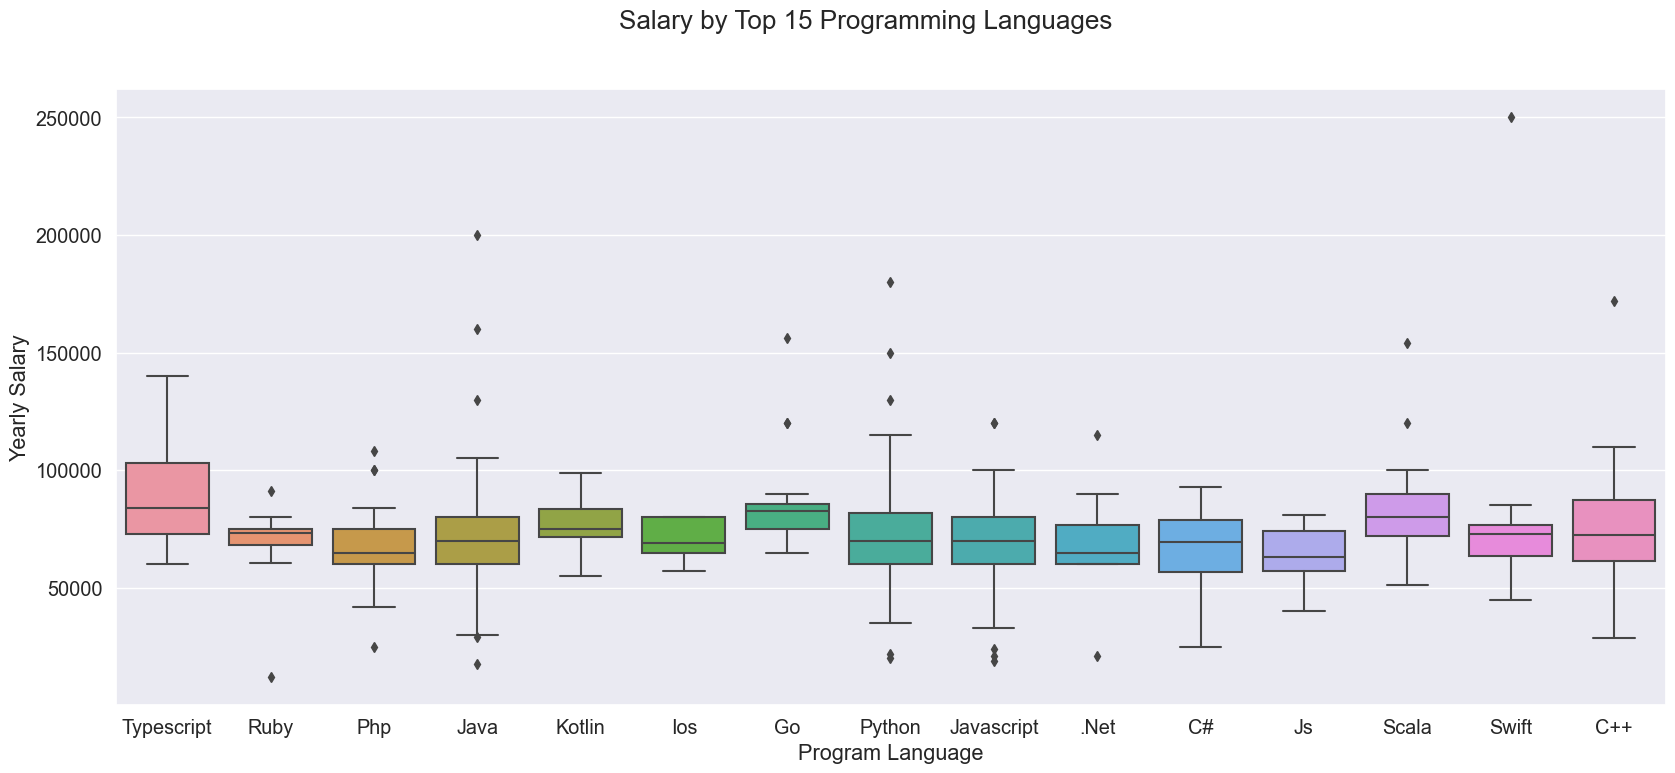

In [89]:
pr_top=[]
for x in program['Program']:
     if x not in pr_top:
        pr_top.append(x)
        
pr_df = data_filtered[data_filtered['Tech_program_language'].isin(pr_top)] 
sns.boxplot(data=pr_df, x="Tech_program_language", y="Yearly_salary")
plt.xlabel('Program Language')
plt.ylabel('Yearly Salary')
plt.gcf().set_size_inches(20, 8)
plt.suptitle('Salary by Top 15 Programming Languages')
plt.show()

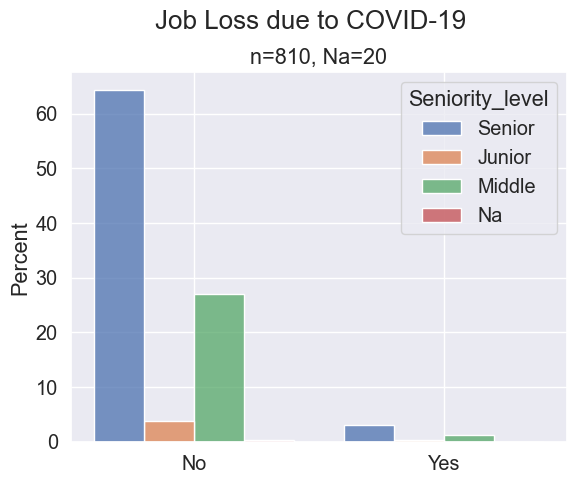

In [90]:
sns.histplot(data_filtered, x="Job_loss_COVID", stat="percent", multiple="dodge", shrink=.8, hue='Seniority_level')
plt.suptitle('Job Loss due to COVID-19',y=1.01)
plt.title('n=810, Na=20')
plt.xlabel('')
plt.show()

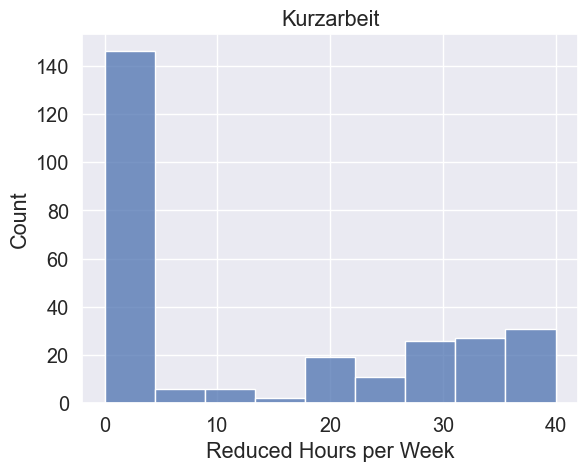

In [91]:
sns.set(font_scale=1.3)
plot=sns.histplot(data_filtered.Kurzarbeit,bins=9)
plt.title('Kurzarbeit')
plt.xlabel('Reduced Hours per Week')
plt.show()